In [57]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

**시간을 10초로 하여, Waveform을 만듦. (음성파일을 load를 할 때 설정함 / 인위적으로 자르면 안됨)**

In [58]:
from google.colab import drive
drive.mount('/content/gdrive')

colab_path='/content/gdrive'
file_path = colab_path+'/MyDrive/Colab Notebooks/디지털사운드/과제2_박요셉/중간_20190320_박요셉.wav'
y, sr = librosa.load(file_path, sr=None, duration=10) #sr(sampling rate): default 22050

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Text(0.5, 1.0, 'Waveform')

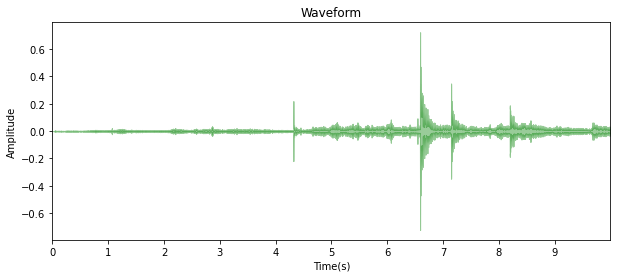

In [59]:
fig = plt.figure(figsize=(10,4))
librosa.display.waveplot(y, sr=sr, alpha=0.4, color='green')
#alpha : 투명도
#waveform으로 보여주는 함수
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Waveform")


**음성파일을 들을 수 있는 IPython Audio Display를 만듬**

In [60]:
ipd.Audio(y, rate=sr)


**3개의 스펙트로그램을 구축 : linear, log, mel**

linear

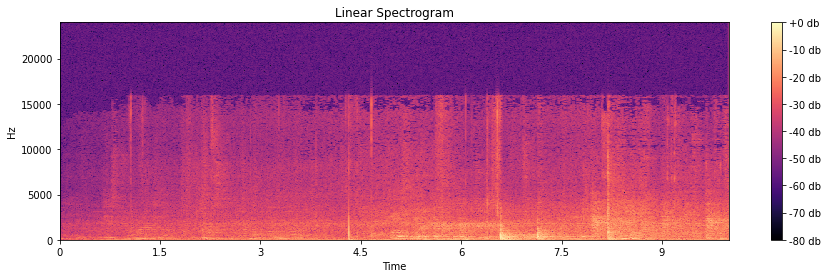

In [61]:
hop_length = 512 # 샘플의 수
n_fft = 2048 # 윈도우 # spectral resolution / window length

stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
spec = np.abs(stft)
spectrogram = librosa.power_to_db(spec, ref=np.max)

plt.figure(figsize=(15,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis="time", y_axis="linear",fmax=24000);

plt.colorbar(format="%+2.0f db");
plt.title('Linear Spectrogram');

log

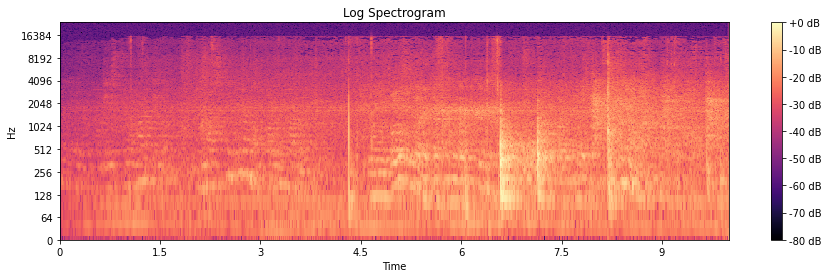

In [62]:
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
spec = np.abs(stft)
spectrogram = librosa.power_to_db(spec, ref=np.max)

plt.figure(figsize=(15,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log', fmax=24000);
plt.colorbar(format='%+2.0f dB');
plt.title('Log Spectrogram');

mel (pandas 활용)

In [63]:
S_dB = librosa.feature.melspectrogram(y, sr=sr)
S_dB = librosa.power_to_db(S_dB, ref=np.max)
S_dB = pd.DataFrame(S_dB) #pandas table로 변환
S_dB

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937
0,-80.0,-80.0,-80.000000,-64.765968,-57.636826,-56.578537,-56.871521,-56.175766,-56.367722,-56.353737,-54.864792,-52.742119,-52.974701,-56.120075,-60.206810,-64.839722,-60.928551,-61.439415,-60.883621,-56.164650,-53.494713,-56.101723,-58.743820,-55.008930,-52.364090,-54.204102,-57.725090,-52.837296,-51.389954,-53.017380,-57.485817,-59.159790,-56.369339,-52.409164,-49.505577,-47.220329,-45.640652,-44.594566,-44.976128,-44.948280,...,-36.502319,-38.076374,-39.564259,-37.299374,-37.432350,-43.818428,-42.086231,-38.874405,-38.531689,-37.709610,-37.615707,-38.396713,-38.924988,-39.528908,-38.002254,-37.730225,-39.003548,-41.065384,-40.570145,-37.424294,-34.125275,-33.048683,-33.593269,-33.831905,-35.268581,-39.972755,-41.703117,-42.129463,-45.412270,-40.122440,-34.966770,-36.105717,-39.461662,-42.233360,-41.432083,-36.387268,-36.572330,-38.405556,-36.661350,-34.490540
1,-80.0,-80.0,-77.149864,-60.513969,-53.878281,-56.357430,-60.683632,-58.755211,-57.075798,-56.639206,-55.773224,-53.837105,-52.850647,-55.092491,-57.737686,-55.292145,-58.021111,-61.684860,-55.068527,-55.551224,-53.256058,-59.219414,-56.024860,-52.431763,-52.765465,-52.956451,-56.620682,-54.598488,-52.588768,-52.890675,-58.872093,-58.851219,-59.611176,-55.036118,-48.340851,-47.385399,-45.747978,-46.701740,-45.075050,-45.631348,...,-37.709396,-36.892567,-42.794983,-36.615738,-36.024277,-42.862057,-36.557716,-37.760384,-40.656380,-38.998375,-38.767807,-40.106434,-40.927734,-40.622673,-37.020012,-34.634987,-41.316982,-43.902710,-43.462059,-39.207615,-34.301037,-33.906246,-36.538597,-34.220123,-35.627724,-39.984619,-39.057991,-41.081680,-39.478477,-32.000389,-30.387779,-33.836124,-38.882065,-42.391285,-36.949875,-36.210762,-38.317581,-42.238159,-38.802265,-41.776237
2,-80.0,-80.0,-70.113243,-61.398293,-56.329689,-57.168411,-64.611000,-59.017670,-56.487511,-57.533913,-60.195930,-59.904564,-59.146912,-54.316513,-51.493813,-50.270775,-57.187752,-58.318466,-52.564018,-54.453941,-52.193634,-55.026524,-53.675529,-49.702751,-50.165413,-49.988739,-54.021343,-54.813866,-56.860535,-55.051682,-52.641144,-55.502762,-65.861450,-55.988544,-48.264984,-46.946835,-46.323013,-46.765347,-48.425388,-51.713097,...,-31.534855,-33.422588,-38.470993,-34.796844,-35.439606,-38.586426,-33.279846,-35.159981,-40.539536,-40.741405,-38.825401,-34.398201,-32.934212,-35.187012,-36.004410,-35.338089,-41.191338,-38.736530,-37.313698,-38.896042,-36.433102,-38.416264,-43.983604,-35.109821,-32.914581,-31.556686,-31.856667,-34.233814,-30.245056,-27.644241,-31.567932,-29.510750,-32.138592,-35.597275,-33.492611,-35.373535,-33.364113,-32.575584,-31.973633,-36.980991
3,-80.0,-80.0,-65.090378,-62.985779,-61.501518,-59.408516,-60.624413,-61.395081,-61.261696,-60.507019,-58.086617,-58.993156,-58.104706,-56.420364,-53.574631,-52.995728,-57.656815,-59.509468,-54.639290,-56.144379,-53.731358,-54.540833,-53.964951,-48.779358,-49.336418,-46.659454,-48.838150,-48.264183,-53.423836,-57.207047,-49.175713,-50.890823,-59.087212,-52.957664,-51.329735,-48.989975,-49.598980,-50.543556,-51.993149,-53.080559,...,-33.760788,-35.985573,-38.813004,-37.063812,-38.447578,-39.606285,-39.460556,-38.048904,-40.892029,-37.042484,-31.854694,-27.239283,-28.918621,-32.277542,-39.454964,-39.097248,-47.944111,-36.338245,-33.675644,-38.702728,-37.405411,-39.317741,-42.881416,-38.955650,-32.829361,-31.640358,-34.397644,-33.873817,-32.125900,-30.482939,-27.996908,-29.716541,-36.663601,-35.545059,-38.062431,-34.983536,-32.717636,-34.287487,-33.273232,-35.316635
4,-80.0,-80.0,-61.155182,-51.146072,-48.585030,-47.239609,-49.536667,-54.959625,-58.474899,-52.864017,-47.809616,-47.220947,-50.306473,-52.013054,-47.854576,-49.033150,-59.142296,-57.075562,-52.701332,-55.537254,-54.49865

In [64]:
mMscaler = MinMaxScaler()
sdscaler = StandardScaler()

#표준화와 정규화
S_dB = sdscaler.fit_transform(S_dB)
S_dB = mMscaler.fit_transform(S_dB)
S_dB = pd.DataFrame(S_dB)
S_dB

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937
0,0.0,0.0,0.000000,0.441590,0.562831,0.600525,0.697850,0.779219,0.873801,0.704205,0.691828,0.800558,0.909176,0.853252,0.580414,0.454721,0.715635,0.751260,0.696763,0.933034,0.953209,0.775216,0.683634,0.709064,0.735883,0.706992,0.627435,0.762103,0.815385,0.834146,0.716917,0.592692,0.720764,0.917548,0.942994,0.950589,1.000000,1.000000,1.000000,1.000000,...,0.897504,0.900085,0.973675,0.944638,0.955280,0.873665,0.811508,0.917163,0.809273,0.750088,0.787843,0.745951,0.755732,0.765761,0.806996,0.806501,0.783436,0.772718,0.802960,0.838069,0.937009,0.974546,0.921725,0.949470,0.915766,0.826270,0.795476,0.805872,0.628390,0.720290,0.823739,0.784402,0.742503,0.743860,0.771220,0.844255,0.845013,0.877068,0.894945,0.993099
1,0.0,0.0,0.137908,0.564843,0.657425,0.606194,0.582828,0.694853,0.847620,0.695703,0.666824,0.768399,0.913350,0.889969,0.652818,0.741093,0.824734,0.741325,0.908714,0.957047,0.961792,0.674083,0.771080,0.782186,0.725195,0.741187,0.658544,0.712689,0.781219,0.838063,0.672774,0.601468,0.621884,0.830188,0.979011,0.945802,0.996876,0.940484,0.997176,0.980513,...,0.872598,0.925501,0.895880,0.959762,0.986879,0.896758,0.929840,0.942007,0.767809,0.727229,0.766428,0.715296,0.718884,0.745066,0.825870,0.865558,0.739227,0.716407,0.744069,0.802966,0.933419,0.956746,0.863225,0.941486,0.908413,0.826025,0.850419,0.828168,0.736195,0.866995,0.907497,0.824961,0.753119,0.740750,0.860849,0.847671,0.811054,0.796253,0.850735,0.834112
2,0.0,0.0,0.478385,0.539209,0.595728,0.585400,0.464329,0.686269,0.869372,0.669058,0.545092,0.590199,0.701533,0.917695,0.835913,0.891705,0.856004,0.877584,1.000000,1.000000,1.000000,0.810093,0.846639,0.859615,0.794428,0.822524,0.731761,0.706647,0.659474,0.771258,0.871185,0.696698,0.431243,0.798514,0.981357,0.958520,0.980140,0.938688,0.901517,0.807005,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.770089,0.696314,0.765357,0.817645,0.865955,0.847915,0.845385,0.852143,0.741628,0.818938,0.869275,0.809099,0.889870,0.863134,0.715353,0.923189,0.963958,1.000000,1.000000,0.973888,0.903948,0.945679,0.885910,0.902256,0.876633,0.874566,0.929981,0.863878,0.907438,1.000000,0.991746,0.938753
3,0.0,0.0,0.721424,0.493193,0.465565,0.527964,0.584615,0.608511,0.692847,0.580517,0.603150,0.616967,0.736594,0.842523,0.774895,0.809972,0.838403,0.829377,0.924360,0.933828,0.944699,0.825848,0.837330,0.885814,0.816503,0.913770,0.877760,0.890411,0.757419,0.704626,0.981534,0.827860,0.637866,0.899308,0.886584,0.899270,0.884796,0.831975,0.799650,0.767992,...,0.954071,0.944974,0.991765,0.949849,0.932497,0.975374,0.867708,0.935573,0.763210,0.761920,0.894929,0.946005,0.939838,0.902965,0.779082,0.780419,0.612583,0.866536,0.943362,0.812904,0.870011,0.844422,0.737245,0.844097,0.965703,0.998273,0.947221,0.981549,0.869777,0.894405,0.951230,0.898579,0.793752,0.875595,0.838601,0.871428,0.920017,0.963903,0.964910,0.975072
4,0.0,0.0,0.911834,0.836391,0.790644,0.839974,0.919163,0.818995,0.795889,0.808131,0.886017,0.962714,0.998940,1.000000,0.942629,0.928827,0.782662,0.927892,0.994995,0.957594,0.917104,0.823490,0.939924,1.000000,1.000000,1.000000,1.000000,0.950196,0.708595,0.790074,1.000000,1.000000,0.967118,1.000000,0.896758,0.885216,0.807408,0.673627,0.809497,0.884130,...,0.822470,0.730975,0.782866,0.780397,0.777601,0.718386,0.670343,0.793564,0.756573,0.901843,1.000000,0.958389,0.886336,0.872877,0.809793,0.742807,0.763715,0.923709,1.000000,0.830369,0.756947,0.908661,0.867308,0.816513,0.824690,0.790766,0.802763,0.879503,0.916811,0.891171,0.864748,0.863750,0.817090,0.809541,0.842072,0.896891,0.916864,0.949768,0.841774,0.941239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [65]:
S_dB = S_dB*255
#1ch 이미지 만들기 > rgb 중 하나만 256

Text(0.5, 1.0, 'Mel Spectrogram')

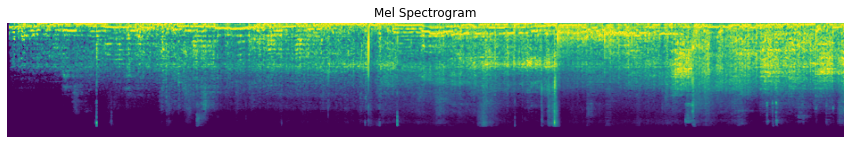

In [66]:
#pandas를 다시 행렬구조 array로 바꿈.
S_dB = np.array(S_dB)
plt.figure(figsize=(15,4))


plt.axis(False)
plt.imshow(S_dB) #numpy 값을 이미지화 시켜주는 함수 / cmap을 넣으면 색깔 바꿀 수 잇음.
plt.title('Mel Spectrogram')

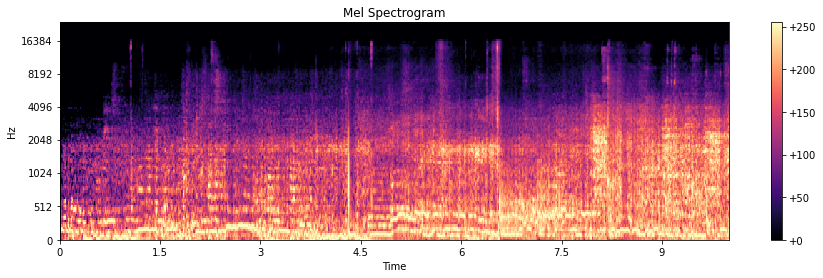

In [56]:

plt.figure(figsize=(15,4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=24000);
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f');
